# C04 - Esemble Methods

## 1. Data Source and Contents

In [42]:
# Install necessary packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
 
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

from tabulate import tabulate

!pip install six
from six import StringIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Read in data
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

We already made the necessary DQA analysis in CA03, so for CA04, we will make those transformations right away.

In [44]:
#Encode Variables
df2 = pd.get_dummies(df, columns=["hours_per_week_bin","occupation_bin","msr_bin",
                                  "capital_gl_bin", "race_sex_bin","education_num_bin",
                                  "education_bin", "workclass_bin"	,"age_bin"], 
                          prefix=["hours_per_week_bin","occupation_bin","msr_bin",
                                  "capital_gl_bin", "race_sex_bin","education_num_bin",
                                  "education_bin", "workclass_bin"	,"age_bin"])
df2.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,train,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,train,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [45]:
df2.rename({"capital_gl_bin_a. = 0": "capital_gl_bin_a.", 
           "capital_gl_bin_b. < 0": "capital_gl_bin_b.", 
           "capital_gl_bin_c. > 0": "capital_gl_bin_c."}, 
          axis = "columns", inplace = True)

In [46]:
# Splitting data into Training and Testing
train_data = df2[df2.flag == "train"]
test_data = df2[df2.flag == "test"]

In [47]:
# Split testing and training data with independant and dependant variables
x_train = train_data.iloc[:,2:]
y_train = train_data["y"]

x_test = test_data.iloc[:,2:]
y_test = test_data["y"]

Now that the data has been encoded and split into training and testing data, we can test our ensemble models on the data.

## 2. Finding Optimal Value of a Key Ensemble Method Hyper-Parameter

Per the instructions, we need to use the sample code to understand how the optimal hyper-paramter is determined.

<AxesSubplot:>

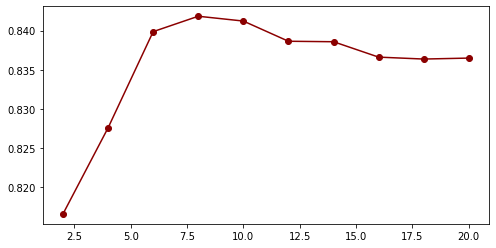

In [48]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees,random_state=101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color = "darkred",marker= "o")

In this case, the optimal hyper-parameter for Max Depth is 8.

## 3. Building a Random Forest Model

First we need to test:


1.   Accuracy vs n_estimators
2.   AUC vs n_estimators

Once we do this, we can determine the optimal number of estimators to use and produce a model.



<AxesSubplot:>

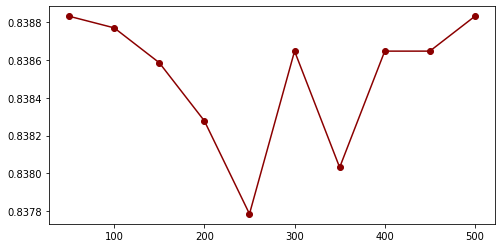

In [49]:
# Plotting the results of Accuracy vs n_estimators
results = []
y_pred = []
auc_score =[]
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = RandomForestClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc_score.append(roc_auc_score(y_test, y_pred))

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred",marker = "o")

<AxesSubplot:>

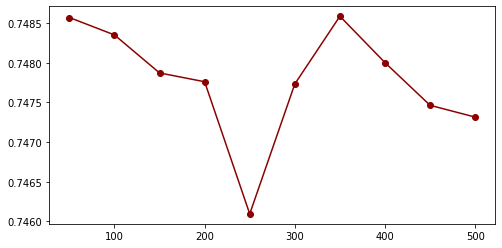

In [50]:
# Plotting the results of AUC vs n_estimators
plt.figure(figsize = (8,4))
pd.Series(auc_score, n_estimator_options).plot(color = "darkred",marker = "o")

Questions
1. Write your observations about the Classifier's behavior with respect to the number of estimators.


> The first graph produced that measures accuracy shows an odd looking "W" shape as the number of estimators in the different models increase. The second graph that measures AUC has a "V" shape. Based on the two graphs, I think that it is best to keep the model simple and choose an n_estimator hyper-parameter of 100.

2. Is there an optimal value of the estimator within the given range?

> Based on the two graphs, I think that it is best to keep the model simple and choose an n_estimator hyper-parameter of 100.

In [51]:
# Creating and Testing the Model
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(x_train,y_train)
y_pred = rforest.predict(x_test)
RF_accuracy = np.mean(y_test == y_pred)
RF_auc = roc_auc_score(y_test, y_pred)

## 4. Building AdaBoost, Gradient Boost, and XGB

We need to repeat the process that we did in step 3 for AdaBoost, Gradient Boost, and XGB. 

### AdaBoost

<AxesSubplot:>

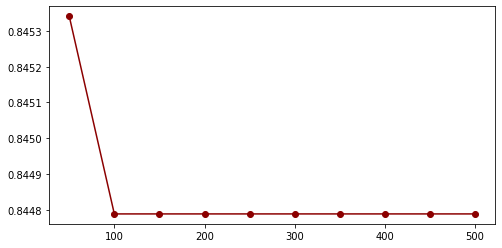

In [52]:
# AdaBoost
# Plotting the results of Accuracy vs n_estimators
results = []
y_pred = []
auc_score =[]
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc_score.append(roc_auc_score(y_test, y_pred))

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred",marker = "o")

<AxesSubplot:>

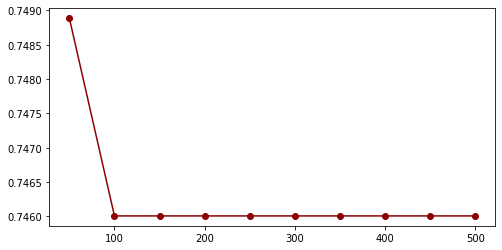

In [53]:
# Plotting the results of AUC vs n_estimators
plt.figure(figsize = (8,4))
pd.Series(auc_score, n_estimator_options).plot(color = "darkred",marker = "o")

Questions
1. Write your observations about the Classifier's behavior with respect to the number of estimators.


> Both graphs paint very similar pictures. The accuracy and AUC value for n_estimators with 50 is higher than the rest of the points tested. I am not sure why that this is the case, but it makes it clear which value to choose for n_estimators. It is important, though, to look at the graph axes. Although the difference vertically seems very significant, the data points are actually close in value to each other. For example, in the AUC curve the difference is about 0.3%.

2. Is there an optimal value of the estimator within the given range?

> Based on the above, we can choose n_estimaors as 50 for the AdaBoost model.

In [54]:
# Creating and Testing the Model
ABmodel = RandomForestClassifier(n_estimators = 50)
ABmodel.fit(x_train,y_train)
y_pred = ABmodel.predict(x_test)

### Gradient Boost

<AxesSubplot:>

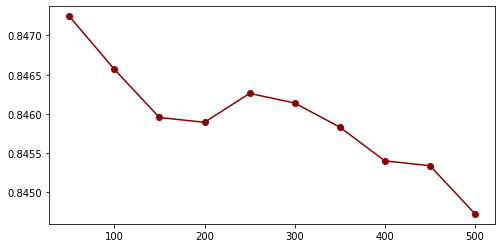

In [55]:
# Gradient Boost
# Plotting the results of Accuracy vs n_estimators
results = []
y_pred = []
auc_score =[]
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc_score.append(roc_auc_score(y_test, y_pred))

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred",marker = "o")

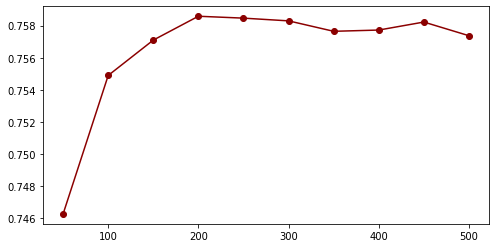

In [56]:
# Plotting the results of AUC vs n_estimators
plt.figure(figsize = (8,4))
pd.Series(auc_score, n_estimator_options).plot(color = "darkred",marker = "o")
AB_accuracy = np.mean(y_test == y_pred)
AB_auc = roc_auc_score(y_test, y_pred)

Questions
1. Write your observations about the Classifier's behavior with respect to the number of estimators.


> The accracy graph has an overall trend of decreasing as the number of estimators increases. There is an increase in accuracy though between 200 and 250 as the number of estimators. On the AUC graph, the AUC increases sharply from 50 to 100 estimators, then levels out as n_estimators increases.

2. Is there an optimal value of the estimator within the given range?

> There is no specific point that is clearly the best based on the two graphs, but I decided to choose n_estimators as 250 since it produced a result of near max AUC and the third highest point of accuracy based on the number of estimators.

In [57]:
# Creating and Testing the Model
GBmodel = GradientBoostingClassifier(n_estimators = 250)
GBmodel.fit(x_train,y_train)
y_pred = GBmodel.predict(x_test)
GB_accuracy = np.mean(y_test == y_pred)
GB_auc = roc_auc_score(y_test, y_pred)

### XGB Model

<AxesSubplot:>

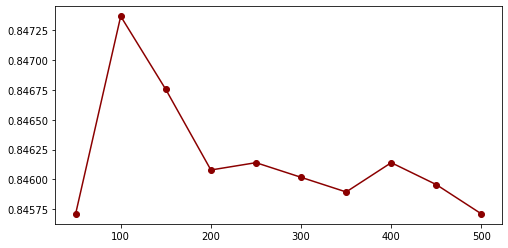

In [58]:
# X Gradient Boost
# Plotting the results of Accuracy vs n_estimators
results = []
y_pred = []
auc_score =[]
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = XGBClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)
  auc_score.append(roc_auc_score(y_test, y_pred))

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred",marker = "o")

<AxesSubplot:>

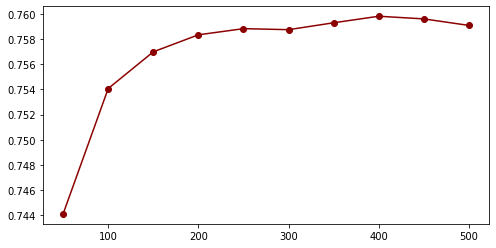

In [59]:
# Plotting the results of AUC vs n_estimators
plt.figure(figsize = (8,4))
pd.Series(auc_score, n_estimator_options).plot(color = "darkred",marker = "o")

Questions
1. Write your observations about the Classifier's behavior with respect to the number of estimators.


> The classifier's accuracy maxes out with 100 estimators, then drops before it levels out as n_estimators increases up to 500. The difference in accuracy, though, is not significant as the difference between the highest and lowest accuracies is about 0.002. On the other hand, the AUC vs n_estimators curve increases as n_estimators increases. It levels out around 200 estimators. 

2. Is there an optimal value of the estimator within the given range?

> There is no point that is the optimal for both accuracy and AUC, but I decided to choose the number of estimators as 150 since it is the second highest accuracy and has an AUC of right around where it levels off.

In [60]:
# Creating and Testing the Model
XGBmodel = XGBClassifier(n_estimators = 150)
XGBmodel.fit(x_train,y_train)
y_pred = GBmodel.predict(x_test)
XGB_accuracy = np.mean(y_test == y_pred)
XGB_auc = roc_auc_score(y_test, y_pred)

## 5. Compare Performance

In [62]:
data = {'Random Forest': (RF_accuracy, RF_auc),
        'AdaBoost': (AB_accuracy, AB_auc), 
        'Gradient Boost': (GB_accuracy, GB_auc),
        'XGB': (XGB_accuracy, XGB_auc)}
df = pd.DataFrame(data, columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'], index = ['Accuracy', 'AUC'])
df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838462,0.844727,0.846263,0.846263
AUC,0.747793,0.757372,0.758467,0.758467


In terms of accuracy, the XGradident Boost model performed the best while in terms of AUC both Gradient and XGB tied for the highest value.